In [53]:
# library for data description and viz.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
# library for preprocessing, model, pipeline and Decision Tree
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.dummy import DummyClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB, ComplementNB, MultinomialNB

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# import data and take a glance of data

In [55]:
df = pd.read_csv('./heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


In [56]:
# checking data integrity
df.info()
# so in this case we do have different type of data int64 and object which is string i believed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [57]:
# check repeated data
df.duplicated().sum()

0

In [58]:
# seperated numerical and categorical data 
numerical_columns = df.select_dtypes('number').columns
categorical_columns = df.select_dtypes('object').columns
print('numerical columns:\n', numerical_columns)
print('-'*100)
print('categorical columns:\n', categorical_columns)

numerical columns:
 Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')
----------------------------------------------------------------------------------------------------
categorical columns:
 Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


In [59]:
df[numerical_columns].nunique()

Age              50
RestingBP        67
Cholesterol     222
FastingBS         2
MaxHR           119
Oldpeak          53
HeartDisease      2
dtype: int64

In [60]:
df[categorical_columns].nunique()

Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64

In [61]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.20,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.40,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.20,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.00,Flat,1


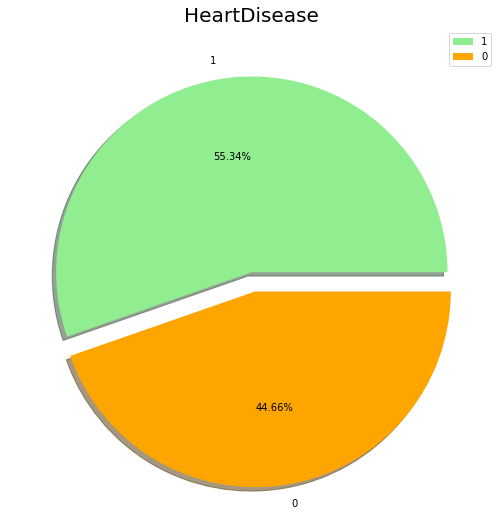

In [19]:
labels = ['1', '0']
size = df['HeartDisease'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('HeartDisease', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

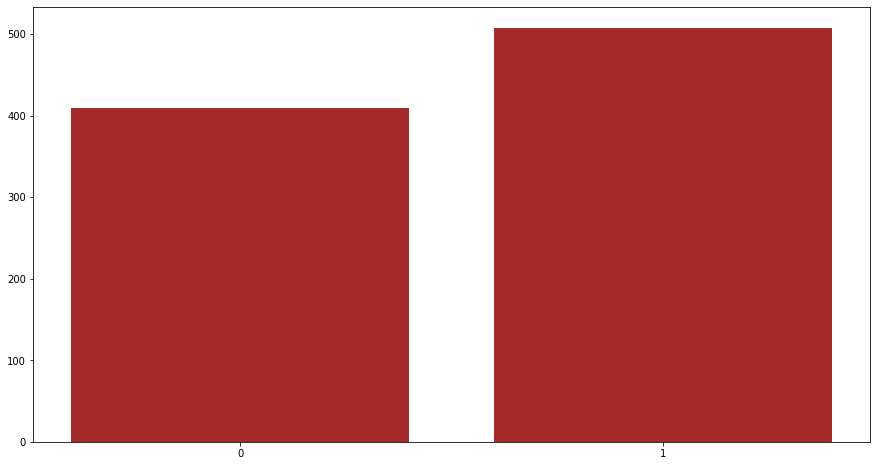

total Heart Disease result
1    508
0    410
Name: HeartDisease, dtype: int64
Percentage of patient do have Heart Disease: 0.553377 
Percentage of patient DON'T have Heart Disease: 0.446623 


In [62]:
# checking whether data skewed or not
plt.bar([0,1],[df.HeartDisease.value_counts()[0],df.HeartDisease.value_counts()[1]], color='brown')
plt.xticks([0,1], [0,1])
plt.show()

print('total Heart Disease result')
print(df.HeartDisease.value_counts())
print('Percentage of patient do have Heart Disease: %f '%(df.HeartDisease.value_counts()[1]/df.HeartDisease.value_counts().sum()))
print('Percentage of patient DON\'T have Heart Disease: %f '%(df.HeartDisease.value_counts()[0]/df.HeartDisease.value_counts().sum()))

In [63]:
# take a sip of Numerical data
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


# Numerical Data Analysis (numerical EDA)

Distrubution of  Age


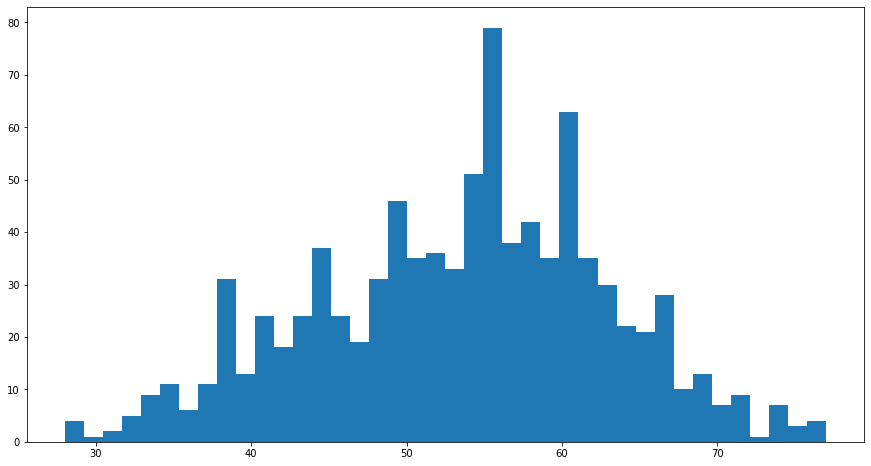

----------------------------------------------------------------------------------------------------
Distrubution of  RestingBP


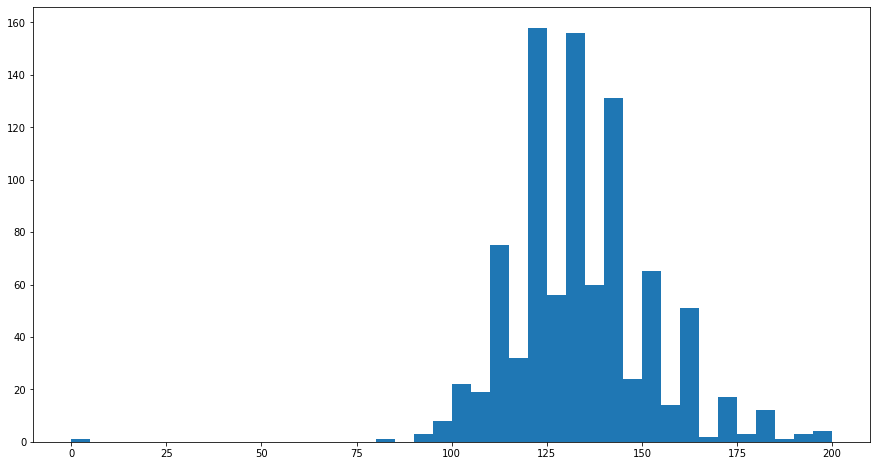

----------------------------------------------------------------------------------------------------
Distrubution of  Cholesterol


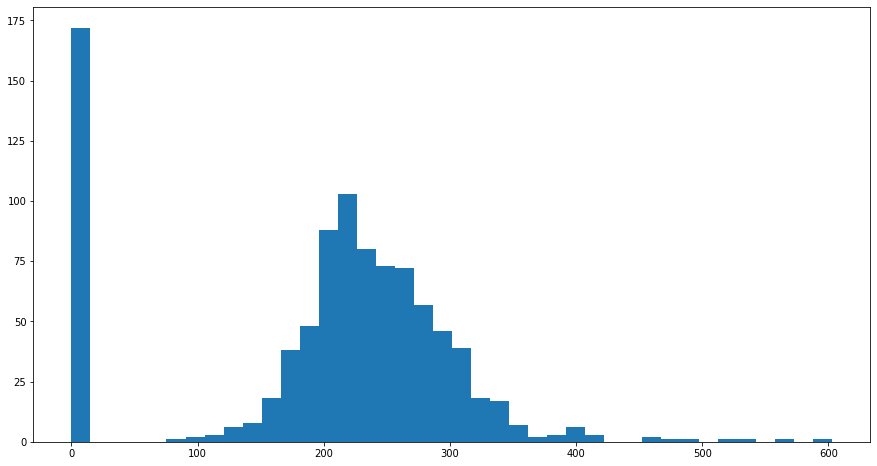

----------------------------------------------------------------------------------------------------
Distrubution of  FastingBS


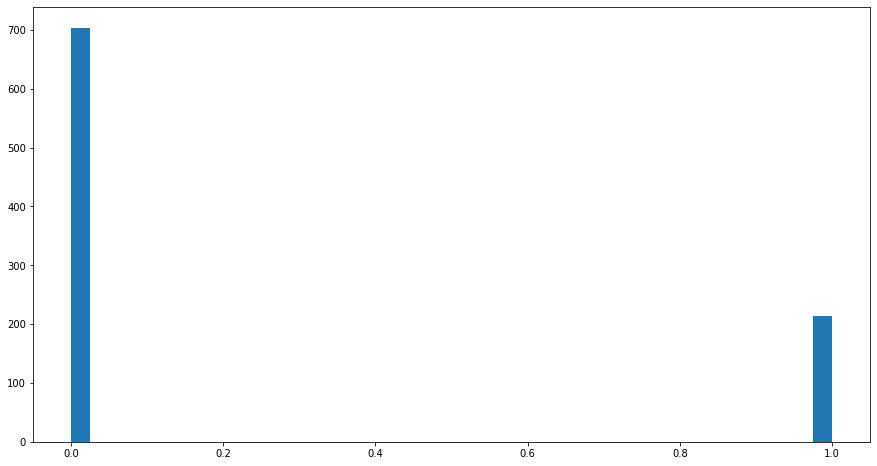

----------------------------------------------------------------------------------------------------
Distrubution of  MaxHR


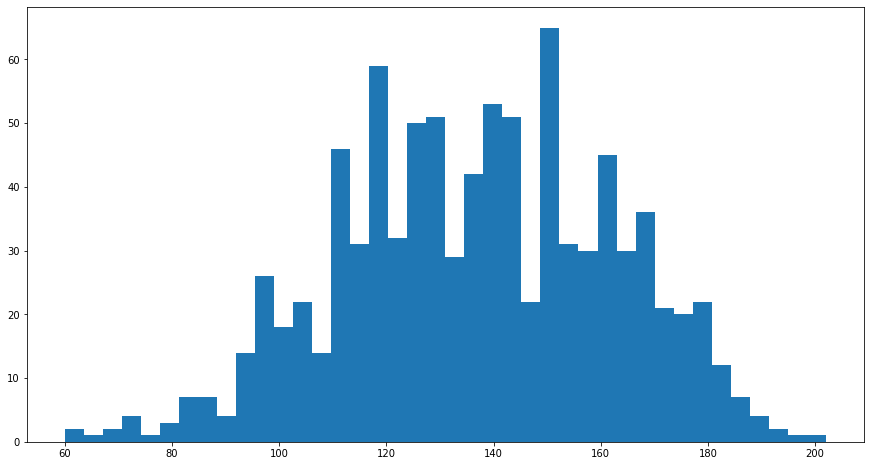

----------------------------------------------------------------------------------------------------
Distrubution of  Oldpeak


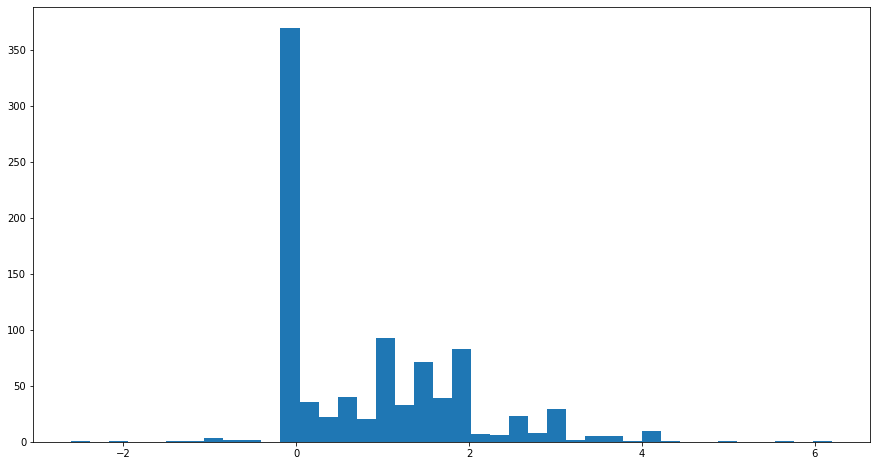

----------------------------------------------------------------------------------------------------
Distrubution of  HeartDisease


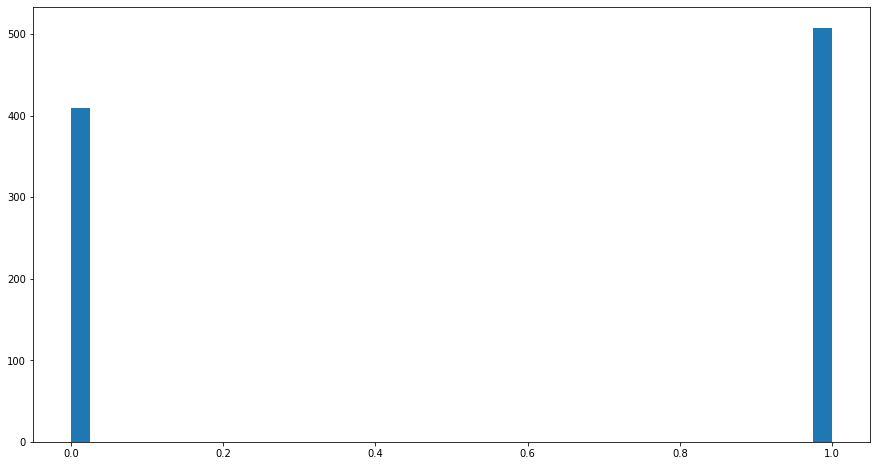

----------------------------------------------------------------------------------------------------


In [64]:
for i in df[numerical_columns]:
    print("Distrubution of ", i)
    plt.hist(df[i], bins=40)
    plt.show()
    print('-'*100)

C:\Users\WithoutSounded\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

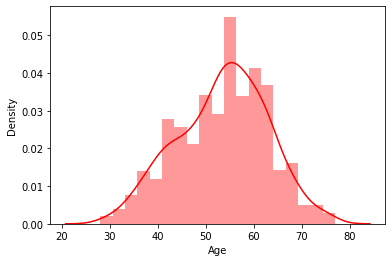

In [18]:
df['HeartDisease'].value_counts()
 
sns.distplot(df['Age'],color='Red')

Text(0.5, 1.0, 'Age vs Heart Disease')

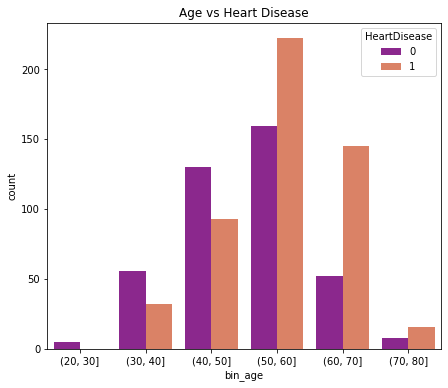

In [22]:
fig,ax=plt.subplots(figsize=(24,6))
plt.subplot(1, 3, 1)
age_bins = [20,30,40,50,60,70,80]
df['bin_age']=pd.cut(df['Age'], bins=age_bins)
g1=sns.countplot(x='bin_age',data=df ,hue='HeartDisease',palette='plasma')
g1.set_title("Age vs Heart Disease")

### Heatmap

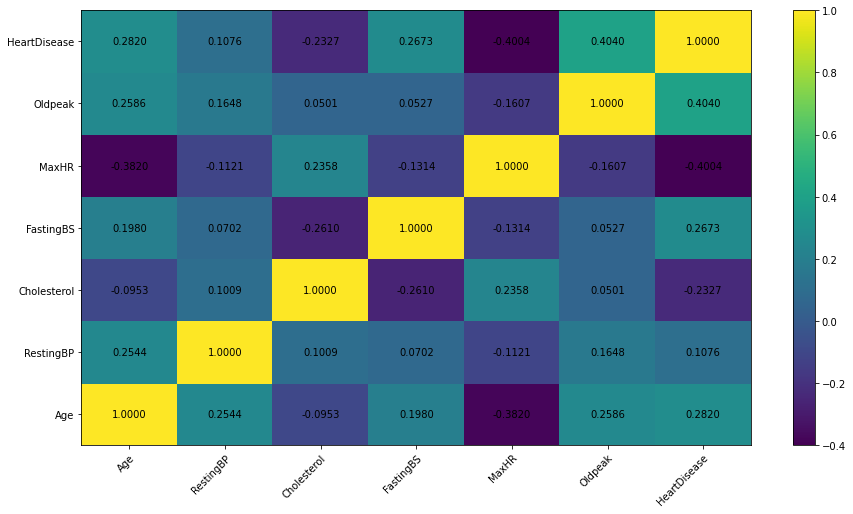

In [65]:
# Heatmap of numerical data correlation
fig, ax = plt.subplots()
ax.set_xticks(np.arange(len(df[numerical_columns].count()))+.5)
ax.set_yticks(np.arange(len(df[numerical_columns].count()))+.5)

ax.set_xticklabels(df[numerical_columns])
ax.set_yticklabels(df[numerical_columns])

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
# ax.spines[:].set_visible(False)
ax.tick_params(which="minor", bottom=False, left=False)

df_num_corr = df[numerical_columns].corr().to_numpy()
for y in range(len(df[numerical_columns].count())):
    for x in range(len(df[numerical_columns].count())):
        plt.text(x+0.5, y+0.5, '%.4f' % df_num_corr[y, x],
                 horizontalalignment='center',
                 verticalalignment='center',
                 )

heatmap = plt.pcolor(df[numerical_columns].corr())
plt.colorbar(heatmap)


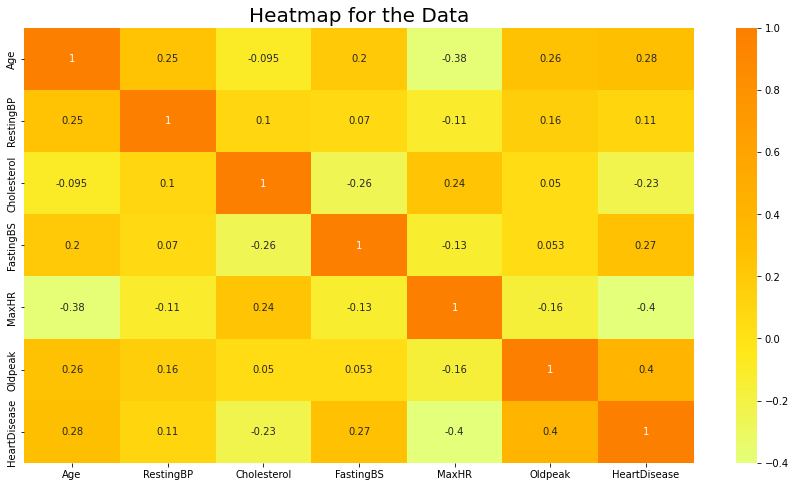

In [21]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(df.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

# Categorical Data Analylsis (categorical EDA)

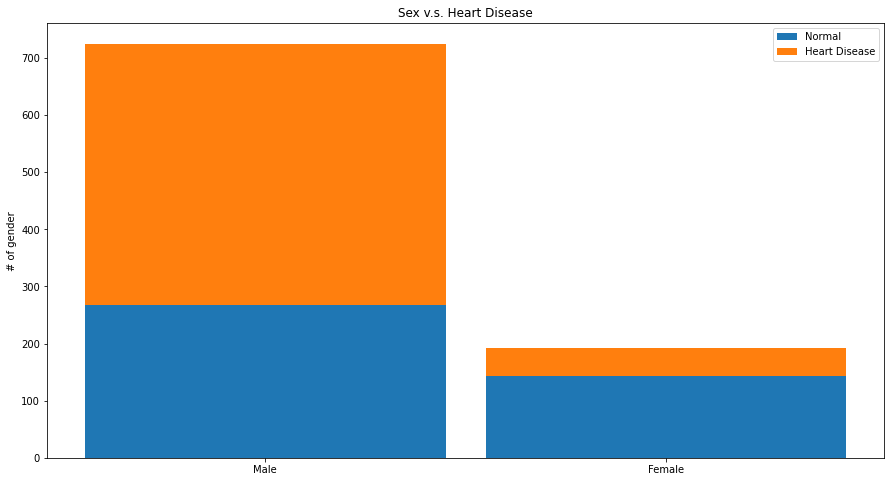

In [66]:
df_s_hd = df[['Sex', 'HeartDisease']]
labels = ['Male', 'Female']
nHD = [len(df_s_hd.loc[(df_s_hd['Sex']=='M') & (df_s_hd['HeartDisease']==0)]),
      len(df_s_hd.loc[(df_s_hd['Sex']=='F') & (df_s_hd['HeartDisease']==0)])]
HD = [len(df_s_hd.loc[(df_s_hd['Sex']=='M') & (df_s_hd['HeartDisease']==1)]),
        len(df_s_hd.loc[(df_s_hd['Sex']=='F') & (df_s_hd['HeartDisease']==1)])]

width = 0.9       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, nHD, width, label='Normal')
ax.bar(labels, HD, width, bottom=nHD, label='Heart Disease')

ax.set_ylabel('# of gender')
ax.set_title('Sex v.s. Heart Disease')
ax.legend()

plt.show()

Text(0.5, 1.0, '')

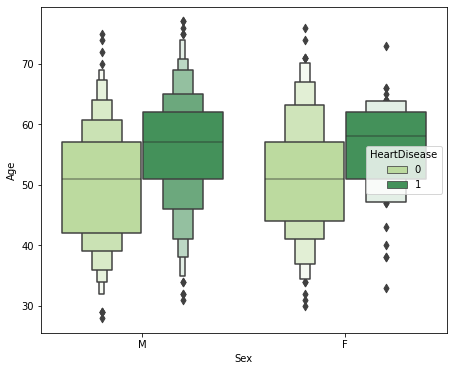

In [20]:
fig,ax=plt.subplots(figsize=(16,6))
plt.subplot(121)
s1=sns.boxenplot(x='Sex',y='Age',hue='HeartDisease',data=df,palette='YlGn')
s1.set_title("")

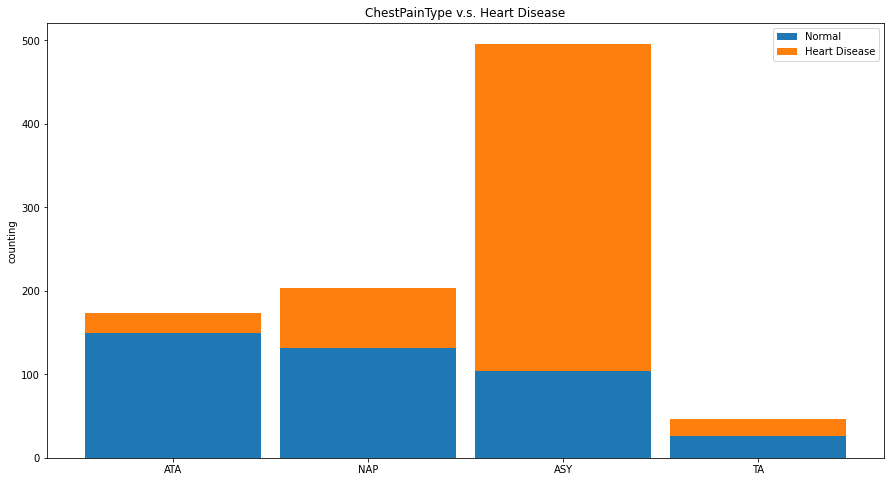

In [67]:
df_cpt_hd = df[['ChestPainType', 'HeartDisease']]
labels = ['ATA', 'NAP','ASY','TA']
nHD = [len(df_cpt_hd.loc[(df_cpt_hd['ChestPainType']=='ATA') & (df_cpt_hd['HeartDisease']==0)]),
       len(df_cpt_hd.loc[(df_cpt_hd['ChestPainType']=='NAP') & (df_cpt_hd['HeartDisease']==0)]),
       len(df_cpt_hd.loc[(df_cpt_hd['ChestPainType']=='ASY') & (df_cpt_hd['HeartDisease']==0)]),
       len(df_cpt_hd.loc[(df_cpt_hd['ChestPainType']=='TA') & (df_cpt_hd['HeartDisease']==0)])
      ]
HD = [len(df_cpt_hd.loc[(df_cpt_hd['ChestPainType']=='ATA') & (df_cpt_hd['HeartDisease']==1)]),
       len(df_cpt_hd.loc[(df_cpt_hd['ChestPainType']=='NAP') & (df_cpt_hd['HeartDisease']==1)]),
       len(df_cpt_hd.loc[(df_cpt_hd['ChestPainType']=='ASY') & (df_cpt_hd['HeartDisease']==1)]),
       len(df_cpt_hd.loc[(df_cpt_hd['ChestPainType']=='TA') & (df_cpt_hd['HeartDisease']==1)])
      ]

width = 0.90       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, nHD, width, label='Normal')
ax.bar(labels, HD, width, bottom=nHD, label='Heart Disease')

ax.set_ylabel('counting')
ax.set_title('ChestPainType v.s. Heart Disease')
ax.legend()

plt.show()

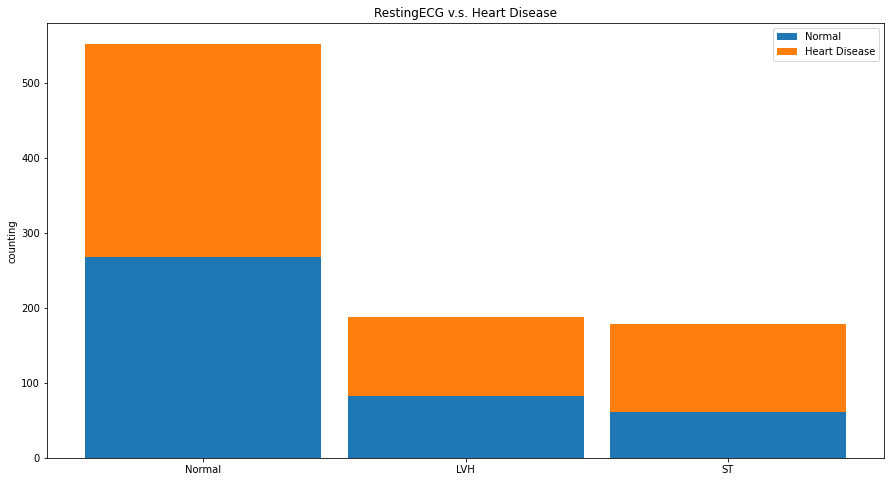

In [68]:
df_ecg_hd = df[['RestingECG', 'HeartDisease']]
labels = ['Normal', 'LVH','ST']
nHD = [len(df_ecg_hd.loc[(df_ecg_hd['RestingECG']=='Normal') & (df_ecg_hd['HeartDisease']==0)]),
       len(df_ecg_hd.loc[(df_ecg_hd['RestingECG']=='LVH') & (df_ecg_hd['HeartDisease']==0)]),
       len(df_ecg_hd.loc[(df_ecg_hd['RestingECG']=='ST') & (df_ecg_hd['HeartDisease']==0)])
      ]
HD = [len(df_ecg_hd.loc[(df_ecg_hd['RestingECG']=='Normal') & (df_ecg_hd['HeartDisease']==1)]),
       len(df_ecg_hd.loc[(df_ecg_hd['RestingECG']=='LVH') & (df_ecg_hd['HeartDisease']==1)]),
       len(df_ecg_hd.loc[(df_ecg_hd['RestingECG']=='ST') & (df_ecg_hd['HeartDisease']==1)])
      ]

width = 0.90       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, nHD, width, label='Normal')
ax.bar(labels, HD, width, bottom=nHD, label='Heart Disease')

ax.set_ylabel('counting')
ax.set_title('RestingECG v.s. Heart Disease')
ax.legend()

plt.show()

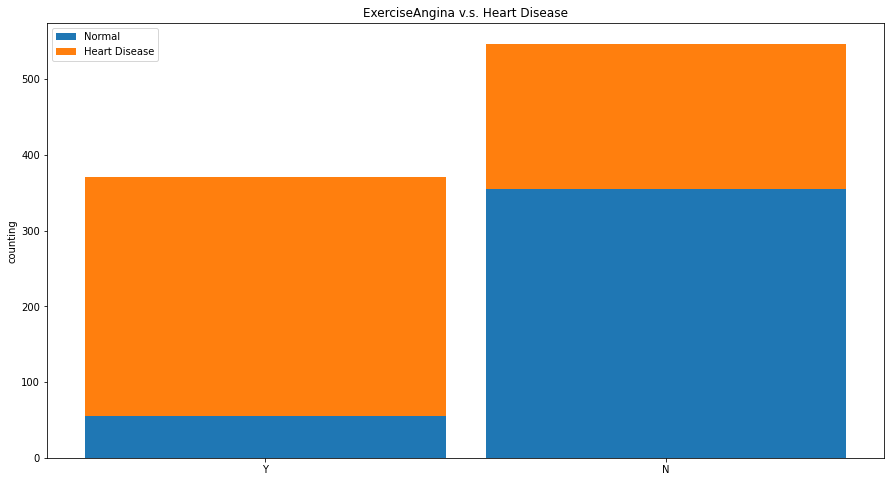

In [69]:
df_ea_hd = df[['ExerciseAngina', 'HeartDisease']]
labels = ['Y','N']
nHD = [len(df_ea_hd.loc[(df_ea_hd['ExerciseAngina']=='Y') & (df_ea_hd['HeartDisease']==0)]),
       len(df_ea_hd.loc[(df_ea_hd['ExerciseAngina']=='N') & (df_ea_hd['HeartDisease']==0)])
      ]
HD = [len(df_ea_hd.loc[(df_ea_hd['ExerciseAngina']=='Y') & (df_ea_hd['HeartDisease']==1)]),
       len(df_ea_hd.loc[(df_ea_hd['ExerciseAngina']=='N') & (df_ea_hd['HeartDisease']==1)])
      ]

width = 0.90       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, nHD, width, label='Normal')
ax.bar(labels, HD, width, bottom=nHD, label='Heart Disease')

ax.set_ylabel('counting')
ax.set_title('ExerciseAngina v.s. Heart Disease')
ax.legend()

plt.show()

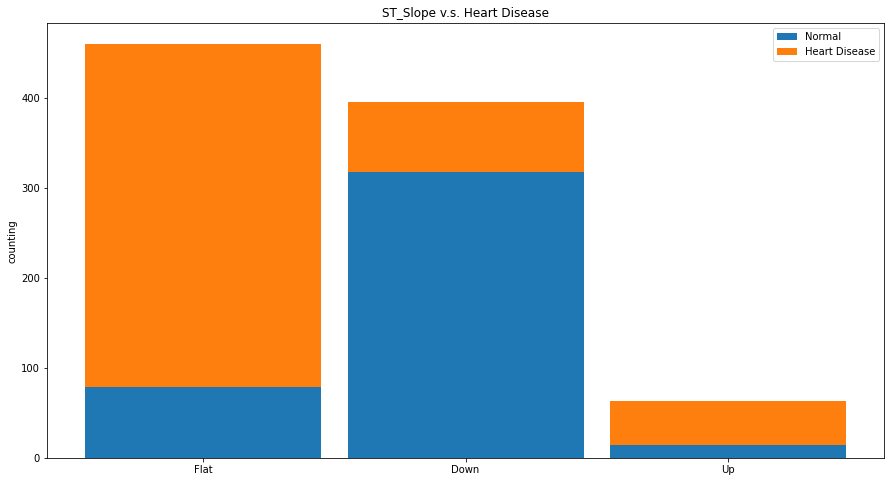

In [70]:
df_st_hd = df[['ST_Slope', 'HeartDisease']]
labels = ['Flat', 'Down','Up']
nHD = [len(df_st_hd.loc[(df_st_hd['ST_Slope']=='Flat') & (df_st_hd['HeartDisease']==0)]),
       len(df_st_hd.loc[(df_st_hd['ST_Slope']=='Up') & (df_st_hd['HeartDisease']==0)]),
       len(df_st_hd.loc[(df_st_hd['ST_Slope']=='Down') & (df_st_hd['HeartDisease']==0)])
      ]
HD = [len(df_st_hd.loc[(df_st_hd['ST_Slope']=='Flat') & (df_st_hd['HeartDisease']==1)]),
       len(df_st_hd.loc[(df_st_hd['ST_Slope']=='Up') & (df_st_hd['HeartDisease']==1)]),
       len(df_st_hd.loc[(df_st_hd['ST_Slope']=='Down') & (df_st_hd['HeartDisease']==1)])
      ]

width = 0.90       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, nHD, width, label='Normal')
ax.bar(labels, HD, width, bottom=nHD, label='Heart Disease')

ax.set_ylabel('counting')
ax.set_title('ST_Slope v.s. Heart Disease')
ax.legend()

plt.show()

## short conclusion of data description
Overall Insights from the Exploratory Data Analysis  
* Target variable(Heart Disease) has close to balanced data.  
* Numerical features have weak correlation with the target variable.  
* Oldpeak (depression related number) has a positive correlation with the heart disease.  
* Maximum heart rate has negative correlation with the heart disease.  
* Interestingly cholesterol has negative correlation with the heart disease.  
* Based on the gender; Men are almost 2.44 times more likely have a heart disease than women.  
* We can observe clear differences among the chest pain type.  
* Person with ASY: Asymptomatic chest pain has almost 6 times more likely have a heart disease than person with ATA Atypical Angina chest pain.  
* RestingECG: resting electrocardiogram results don't differ much.  
* Person with ST: having ST-T wave abnormality is more likely have a heart disease than the others.  
* ExerciseAngina: exercise-induced angina with 'Yes' almost 2.4 times more likley have a heart disaese than exercise-induced angina with 'No'  
* ST_Slope: the slope of the peak exercise ST segment has differences.  
* ST_Slope Up significantly less likely has heart disease than the other two segment.  

# Model Build

### Baseline encoder -- one-hot encoder

In [71]:
x = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

ohe= OneHotEncoder()
data_encoded = ohe.fit_transform(df[categorical_columns]) #WTF
ct= make_column_transformer((ohe, categorical_columns), remainder='passthrough')

# Dummy

In [72]:
accuracy=[]

# defining model
model = DummyClassifier(strategy='constant', constant=0)
pipe = make_pipeline(ct, model)
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

accuracy.append(round(metrics.accuracy_score(y_test, y_pred),4))
print (f'model : {model} and  accuracy score is : {round(metrics.accuracy_score(y_test, y_pred),4)}')

model_names = ['DummyClassifier']
dummy_result_df = pd.DataFrame({'Accuracy':accuracy}, index=model_names)

#  10 fold cross validation
print('#'*100)
print('Cross Validate 10 fold: ')
scores = cross_val_score(pipe, x, y, cv=10)
print(scores)
print('cv-10 average score is : {:.2f} %'.format(scores.mean()*100))
print('#'*100)


dummy_result_df


model : DummyClassifier(constant=0, strategy='constant') and  accuracy score is : 0.4653
####################################################################################################
Cross Validate 10 fold: 
[0.44565217 0.44565217 0.44565217 0.44565217 0.44565217 0.44565217
 0.44565217 0.44565217 0.45054945 0.45054945]
cv-10 average score is : 44.66 %
####################################################################################################


,Accuracy
DummyClassifier,0.47


# Logistic, Linear Discriminant, SVC, KNN

In [73]:
# defining model
lr = LogisticRegression(solver='liblinear')
lda= LinearDiscriminantAnalysis()
svm = SVC(gamma='scale')
knn = KNeighborsClassifier()

In [76]:
models = [lr,lda,svm,knn]
accuracy=[]

for model in models: 
    pipe = make_pipeline(ct, model)
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
#     accuracy.append(round(scores.mean()*100 ,4))
    print('#'*100)
    scores = cross_val_score(pipe, x, y, cv=10)
    accuracy.append(round(scores.mean()*100,4))
    print (f'model {model} \naverage 10-fold cross validation accuracy score is : {round(scores.mean()*100,4)}')
    print('#'*100)
    
model_names = ['Logistic','LinearDiscriminant','SVM','KNeighbors']
result_df1 = pd.DataFrame({'Accuracy':accuracy}, index=model_names)
result_df1

####################################################################################################
model LogisticRegression(solver='liblinear') 
average 10-fold cross validation accuracy score is : 85.2723
####################################################################################################
####################################################################################################
model LinearDiscriminantAnalysis() 
average 10-fold cross validation accuracy score is : 84.7289
####################################################################################################
####################################################################################################
model SVC() 
average 10-fold cross validation accuracy score is : 70.5686
####################################################################################################
####################################################################################################
model KNeighbor

,Accuracy
Logistic,85.27
LinearDiscriminant,84.73
SVM,70.57
KNeighbors,70.24


# Logistic, Linear Discriminant, SVC, KNN with scaler

In [39]:
s= StandardScaler()
ct_ohe_s= make_column_transformer((ohe, categorical_columns),(s, numerical_columns.drop('HeartDisease')))  

In [77]:
accuracy=[]

lr = LogisticRegression(solver='liblinear')
lda= LinearDiscriminantAnalysis()
svm = SVC(gamma='scale')
knn = KNeighborsClassifier()

models = [lr,lda,svm,knn]

for model in models: 
    pipe = make_pipeline(ct_ohe_s, model)
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
#     accuracy.append(round(scores.mean()*100 ,4))
    print('#'*100)
    scores = cross_val_score(pipe, x, y, cv=10)
    accuracy.append(round(scores.mean()*100,4))
    print (f'model {model} \naverage 10-fold cross validation accuracy score is : {round(scores.mean()*100,4)}')
    print('#'*100)
    
model_names = ['Logistic_scl','LinearDiscriminant_scl','SVM_scl','KNeighbors_scl']
result_df = pd.DataFrame({'Accuracy':accuracy}, index=model_names)
result_df

####################################################################################################
model LogisticRegression(solver='liblinear') 
average 10-fold cross validation accuracy score is : 85.1648
####################################################################################################
####################################################################################################
model LinearDiscriminantAnalysis() 
average 10-fold cross validation accuracy score is : 84.7289
####################################################################################################
####################################################################################################
model SVC() 
average 10-fold cross validation accuracy score is : 86.2578
####################################################################################################
####################################################################################################
model KNeighbor

,Accuracy
Logistic_scl,85.16
LinearDiscriminant_scl,84.73
SVM_scl,86.26
KNeighbors_scl,85.49


# Bayes

In [90]:
models = [GaussianNB(), BernoulliNB()]
accuracy = []
 
#[1] Naive Bayes classifier for multivariate Bernoulli models.
#[2] CategoricalNB(), (must not contain negative number), Naive Bayes classifier for categorical features.
#[3] Complement Naive Bayes classifier. , ComplementNB()
#[4] Naive Bayes classifier for multinomial models., MultinomialNB()

for model in models:
    pipe = make_pipeline(ct, model) 
    pipe.fit(x_train,y_train)
    y_pred_rf = pipe.predict(x_test)
    print("Accuracy of naive bayes Classifier :: ", metrics.accuracy_score(y_test, y_pred_rf))

        #  10 fold cross validatio
    print('Cross Validate 10 fold: ')
    scores = cross_val_score(pipe, x, y, cv=10)
    print(scores)
    print('cv-10 average score is : {:.2f} %'.format(scores.mean()*100))
    accuracy.append(round(scores.mean()*100,4))
    print('#'*100)

model_names = ['GaussianNB','BernoulliNB']
result_df = pd.DataFrame({'Accuracy':accuracy}, index=model_names)
result_df

Accuracy of naive bayes Classifier ::  0.8646864686468647
Cross Validate 10 fold: 
[0.81521739 0.92391304 0.88043478 0.92391304 0.86956522 0.83695652
 0.88043478 0.75       0.81318681 0.82417582]
cv-10 average score is : 85.18 %
####################################################################################################
Accuracy of naive bayes Classifier ::  0.858085808580858
Cross Validate 10 fold: 
[0.84782609 0.93478261 0.86956522 0.92391304 0.86956522 0.83695652
 0.86956522 0.81521739 0.76923077 0.79120879]
cv-10 average score is : 85.28 %
####################################################################################################


,Accuracy
GaussianNB,85.18
BernoulliNB,85.28


## Decision Tree

In [79]:
# ***********************Decision Tree Classification***********************
### gini as criterion
decTree = DecisionTreeClassifier(max_depth=3)
pipe = make_pipeline(ct, decTree)
pipe.fit(x_train, y_train)
# print(pipe)

y_pred_decTree = pipe.predict(x_test)
print("Accuracy of Decision Trees : " , metrics.accuracy_score(y_test, y_pred_decTree))

scores = cross_val_score(pipe, x, y, cv=10)
print('cv-10 average score is : {:.2f} %'.format(scores.mean()*100))

#feature_names = pipe.named_steps['columntransformer'].transformers[0][1].get_feature_names(df[categorical].columns).tolist()+df[numerical].columns.tolist()
feature_names = ct.get_feature_names_out().tolist()
feature_names = [feature.split('__')[1] for feature in feature_names]

print('-'*50)
print('Rules are below : ')
print('-'*50)
text_representation = tree.export_text(decTree, feature_names=feature_names)
print(text_representation)

# print(tree.plot_tree(decTree))


Accuracy of Decision Trees :  0.8448844884488449
cv-10 average score is : 80.48 %
--------------------------------------------------
Rules are below : 
--------------------------------------------------
|--- ST_Slope_Up <= 0.50
|   |--- ChestPainType_ASY <= 0.50
|   |   |--- Sex_F <= 0.50
|   |   |   |--- class: 1
|   |   |--- Sex_F >  0.50
|   |   |   |--- class: 0
|   |--- ChestPainType_ASY >  0.50
|   |   |--- Sex_F <= 0.50
|   |   |   |--- class: 1
|   |   |--- Sex_F >  0.50
|   |   |   |--- class: 1
|--- ST_Slope_Up >  0.50
|   |--- Cholesterol <= 42.50
|   |   |--- Age <= 59.50
|   |   |   |--- class: 1
|   |   |--- Age >  59.50
|   |   |   |--- class: 1
|   |--- Cholesterol >  42.50
|   |   |--- ExerciseAngina_Y <= 0.50
|   |   |   |--- class: 0
|   |   |--- ExerciseAngina_Y >  0.50
|   |   |   |--- class: 0



In [92]:
# specify number of folds for k-fold CV
n_folds = 10

# parameters to build the model on
parameters = {'max_depth': range(1, 15)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", random_state = 13)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, cv=n_folds, scoring="accuracy")
pipe = make_pipeline(ct, tree)
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object'))])),
                ('gridsearchcv',
                 GridSearchCV(cv=10,
                              estimator=DecisionTreeClassifier(random_state=13),
                              param_grid={'max_depth': range(1, 15)},
                              scoring='accuracy'))])

In [93]:
# scores of GridSearch CV
scores = tree.cv_results_
data = pd.DataFrame(scores)
data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.00,0.00,0.00,0.00,1,{'max_depth': 1},0.87,0.81,0.84,0.81,0.79,0.74,0.80,0.77,0.80,0.84,0.81,0.04,8
1,0.00,0.00,0.00,0.00,2,{'max_depth': 2},0.89,0.81,0.81,0.76,0.81,0.79,0.85,0.79,0.80,0.85,0.81,0.04,5
2,0.00,0.00,0.00,0.00,3,{'max_depth': 3},0.87,0.81,0.85,0.79,0.79,0.80,0.84,0.75,0.82,0.85,0.82,0.03,3
3,0.00,0.00,0.00,0.00,4,{'max_depth': 4},0.89,0.84,0.90,0.85,0.79,0.84,0.85,0.79,0.85,0.87,0.85,0.04,1
4,0.00,0.00,0.00,0.00,5,{'max_depth': 5},0.84,0.84,0.87,0.82,0.74,0.79,0.87,0.79,0.84,0.80,0.82,0.04,2
5,0.00,0.00,0.00,0.00,6,{'max_depth': 6},0.84,0.82,0.87,0.84,0.77,0.79,0.85,0.75,0.80,0.82,0.82,0.03,4
6,0.00,0.00,0.00,0.00,7,{'max_depth': 7},0.84,0.79,0.84,0.79,0.77,0.80,0.84,0.77,0.82,0.84,0.81,0.03,6
7,0.00,0.00,0.00,0.00,8,{'max_depth': 8},0.82,0.81,0.85,0.82,0.76,0.82,0.85,0.72,0.84,0.79,0.81,0.04,7
8,0.00,0.00,0.00,0.00,9,{'max_depth': 9},0.84,0.76,0.82,0.76,0.76,0.84,0.84,0.74,0.84,0.80,0.80,0.04,9
9,0.00,0.00,0.00,0.00,10,{'max_depth': 10},0.82,0.77,0.82,0.76,0.76,0.79,0.84,0.74,0.84,0.79,0.79,0.03,14


In [94]:
data = data[['param_max_depth', 'rank_test_score','mean_test_score']]
data

,param_max_depth,rank_test_score,mean_test_score
0,1,8,0.81
1,2,5,0.81
2,3,3,0.82
3,4,1,0.85
4,5,2,0.82
5,6,4,0.82
6,7,6,0.81
7,8,7,0.81
8,9,9,0.80
9,10,14,0.79


<function matplotlib.pyplot.show(close=None, block=None)>

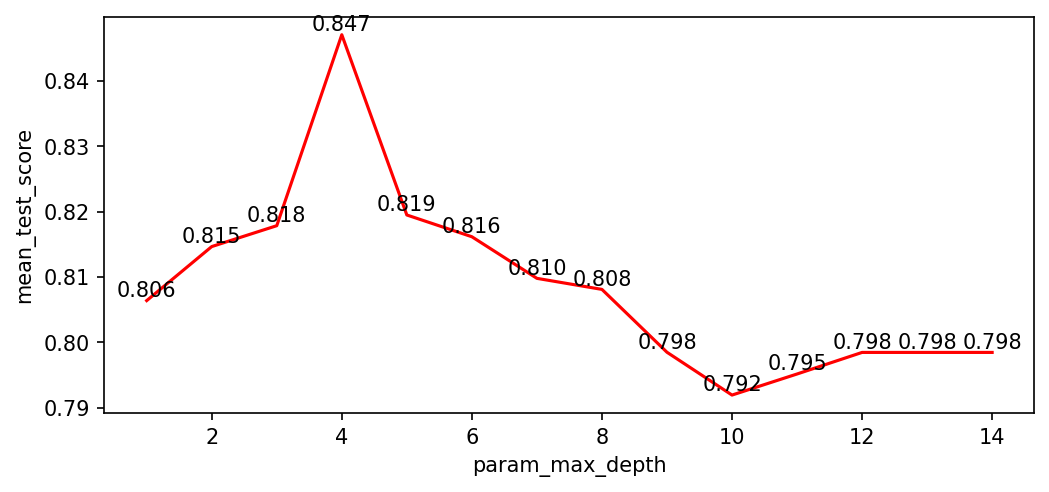

In [95]:
plt.figure(figsize=(8,3.5), dpi=150)

for a, b in zip(data['param_max_depth'], data['mean_test_score']):
    plt.text(a, b, '%.3f'%b, ha = 'center', va = 'bottom', fontsize = 10)
    
plt.plot(data['param_max_depth'], data['mean_test_score'], 'r')

plt.xlabel("param_max_depth")
plt.ylabel("mean_test_score")
    
plt.show

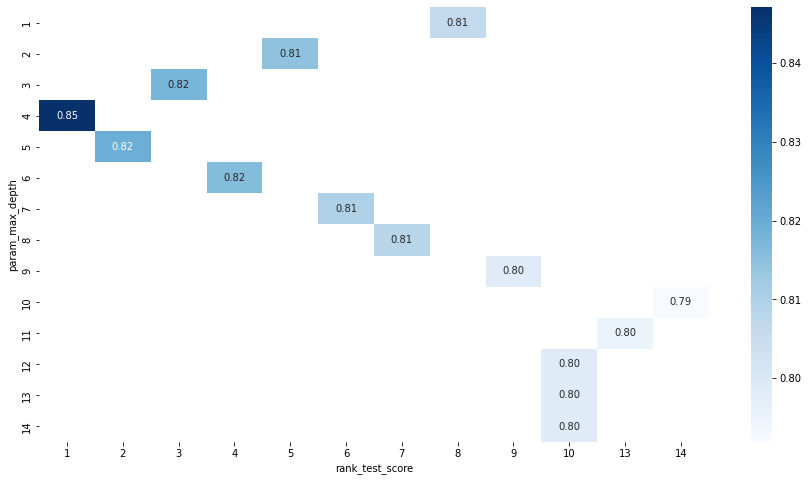

In [96]:
data = data.pivot('param_max_depth', 'rank_test_score','mean_test_score')

ax = sns.heatmap(data, annot=True, fmt='.2f',cmap = "Blues")

In [80]:
# ***********************Decision Tree Classification***********************
### entropy as criterion
decTree = DecisionTreeClassifier(criterion='entropy',max_depth=3)
pipe = make_pipeline(ct, decTree)
pipe.fit(x_train, y_train)
# print(pipe)

y_pred_decTree = pipe.predict(x_test)
print("Accuracy of Decision Trees : " , metrics.accuracy_score(y_test, y_pred_decTree))

scores = cross_val_score(pipe, x, y, cv=10)
print('cv-10 average score is : {:.2f} %'.format(scores.mean()*100))

#feature_names = pipe.named_steps['columntransformer'].transformers[0][1].get_feature_names(df[categorical].columns).tolist()+df[numerical].columns.tolist()
feature_names = ct.get_feature_names_out().tolist()
feature_names = [feature.split('__')[1] for feature in feature_names]

print('-'*50)
print('Rules are below : ')
print('-'*50)
text_representation = tree.export_text(decTree, feature_names=feature_names)
print(text_representation)

# print(tree.plot_tree(decTree))

Accuracy of Decision Trees :  0.8448844884488449
cv-10 average score is : 81.14 %
--------------------------------------------------
Rules are below : 
--------------------------------------------------
|--- ST_Slope_Up <= 0.50
|   |--- ChestPainType_ASY <= 0.50
|   |   |--- Sex_F <= 0.50
|   |   |   |--- class: 1
|   |   |--- Sex_F >  0.50
|   |   |   |--- class: 0
|   |--- ChestPainType_ASY >  0.50
|   |   |--- Sex_M <= 0.50
|   |   |   |--- class: 1
|   |   |--- Sex_M >  0.50
|   |   |   |--- class: 1
|--- ST_Slope_Up >  0.50
|   |--- Cholesterol <= 42.50
|   |   |--- Age <= 59.50
|   |   |   |--- class: 1
|   |   |--- Age >  59.50
|   |   |   |--- class: 1
|   |--- Cholesterol >  42.50
|   |   |--- ChestPainType_ASY <= 0.50
|   |   |   |--- class: 0
|   |   |--- ChestPainType_ASY >  0.50
|   |   |   |--- class: 0



In [107]:
# specify number of folds for k-fold CV
n_folds = 10

# parameters to build the model on
parameters = {'max_depth': range(1, 15)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "entropy", random_state = 10)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, cv=n_folds, scoring="accuracy")
pipe = make_pipeline(ct, tree)
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object'))])),
                ('gridsearchcv',
                 GridSearchCV(cv=10,
                              estimator=DecisionTreeClassifier(criterion='entropy',
                                                               random_state=10),
                              param_grid={'max_depth': range(1, 15)},
                              scoring='accuracy'))])

<function matplotlib.pyplot.show(close=None, block=None)>

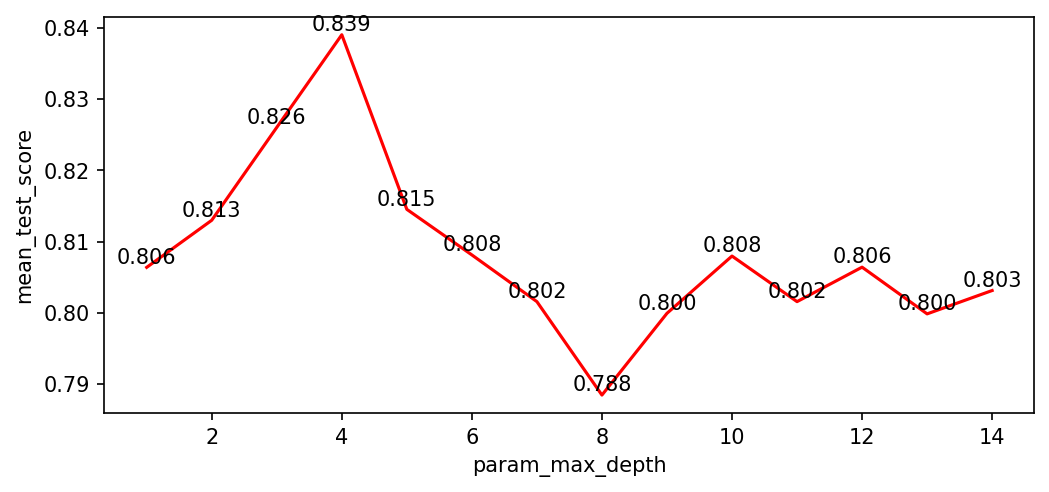

In [108]:
# scores of GridSearch CV
scores = tree.cv_results_
data = pd.DataFrame(scores)
plt.figure(figsize=(8,3.5), dpi=150)

for a, b in zip(data['param_max_depth'], data['mean_test_score']):
    plt.text(a, b, '%.3f'%b, ha = 'center', va = 'bottom', fontsize = 10)
    
plt.plot(data['param_max_depth'], data['mean_test_score'], 'r')

plt.xlabel("param_max_depth")
plt.ylabel("mean_test_score")
    
plt.show

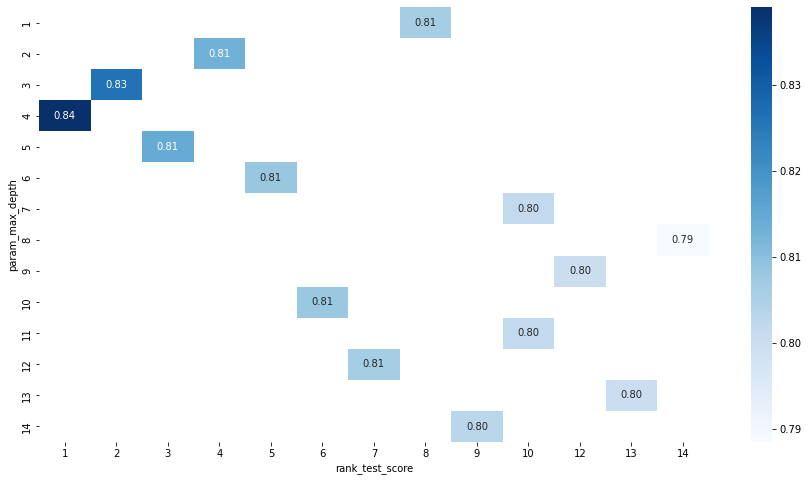

In [109]:
data = data.pivot('param_max_depth', 'rank_test_score','mean_test_score')

ax = sns.heatmap(data, annot=True, fmt='.2f',cmap = "Blues")

# Ensemble Methods

## bagging

## random forest

In [81]:
rf = RandomForestClassifier(n_estimators=1000)
pipe = make_pipeline(ct, rf) 
pipe.fit(x_train,y_train)
y_pred_rf = pipe.predict(x_test)
print("Accuracy of Random Forest Classifier :: ", metrics.accuracy_score(y_test, y_pred_rf))
#Find the score of each feature in model and drop the features with low scores
f_imp = pipe['randomforestclassifier'].feature_importances_
for i,v in enumerate(f_imp):
    print('Feature: %s, Score: %.5f' % (feature_names[i],v))

    #  10 fold cross validation
print('#'*100)
print('Cross Validate 10 fold: ')
scores = cross_val_score(pipe, x, y, cv=10)
print(scores)
print('cv-10 average score is : {:.2f} %'.format(scores.mean()*100))
print('#'*100)

Accuracy of Random Forest Classifier ::  0.8811881188118812
Feature: Sex_F, Score: 0.02220
Feature: Sex_M, Score: 0.02235
Feature: ChestPainType_ASY, Score: 0.08240
Feature: ChestPainType_ATA, Score: 0.01952
Feature: ChestPainType_NAP, Score: 0.01595
Feature: ChestPainType_TA, Score: 0.00727
Feature: RestingECG_LVH, Score: 0.01405
Feature: RestingECG_Normal, Score: 0.01110
Feature: RestingECG_ST, Score: 0.01059
Feature: ExerciseAngina_N, Score: 0.04841
Feature: ExerciseAngina_Y, Score: 0.05442
Feature: ST_Slope_Down, Score: 0.00750
Feature: ST_Slope_Flat, Score: 0.10657
Feature: ST_Slope_Up, Score: 0.12515
Feature: Age, Score: 0.07021
Feature: RestingBP, Score: 0.06982
Feature: Cholesterol, Score: 0.09753
Feature: FastingBS, Score: 0.02317
Feature: MaxHR, Score: 0.09740
Feature: Oldpeak, Score: 0.09440
####################################################################################################
Cross Validate 10 fold: 
[0.92391304 0.93478261 0.80434783 0.88043478 0.85869565 0.84

## boosting

## XGBoost

In [82]:
# 建立 XGBClassifier 模型
xgboostModel = XGBClassifier(n_estimators=100, learning_rate= 0.3)
pipe = make_pipeline(ct, xgboostModel)
# 使用訓練資料訓練模型
pipe.fit(x_train, y_train)
# 使用訓練資料預測分類
predicted = pipe.predict(x_test)
print("Accuracy of XGBoost Classifier : ", metrics.accuracy_score(y_test, predicted))
scores = cross_val_score(pipe, x, y, cv=10)

[21:06:29] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGBoost Classifier :  0.8514851485148515
[21:06:29] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\WithoutSounded\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\WithoutSounded\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\WithoutSounded\anaconda3\lib\site-packages\xgboost\sklearn.py:122

[21:06:29] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:06:29] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:06:29] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\WithoutSounded\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\WithoutSounded\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\WithoutSounded\anaconda3\lib\site-packages\xgboost\sklearn.py:122

[21:06:29] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:06:29] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:06:29] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\WithoutSounded\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\WithoutSounded\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\WithoutSounded\anaconda3\lib\site-packages\xgboost\sklearn.py:122

[21:06:29] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:06:30] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:06:30] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\WithoutSounded\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\WithoutSounded\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [83]:
print(scores)
print('cv-10 average score is : {:.2f} %'.format(scores.mean()*100))

[0.86956522 0.93478261 0.83695652 0.90217391 0.83695652 0.85869565
 0.86956522 0.76086957 0.81318681 0.75824176]
cv-10 average score is : 84.41 %


## Adaboost

In [84]:
# adaboost with the tree as base estimator

estimators = list(range(20,25))
shallow_tree = DecisionTreeClassifier(max_depth=3, random_state = 100)

abc_scores = []
for n_est in estimators:
    ABC = AdaBoostClassifier(
    base_estimator=shallow_tree, 
    n_estimators = n_est)
    
    pipe = make_pipeline(ct, ABC)
    
    
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    score = metrics.accuracy_score(y_test, y_pred)
    abc_scores.append(score)
print(abc_scores)

# estimators 21 has the best result
ABC = AdaBoostClassifier(base_estimator=shallow_tree, n_estimators = 21)
pipe = make_pipeline(ct, ABC)
pipe.fit(x_train, y_train)
scores = cross_val_score(pipe, x, y, cv=10)
print(scores)
print('cv-10 average score is : {:.2f} %'.format(scores.mean()*100))

[0.7953795379537953, 0.8052805280528053, 0.7953795379537953, 0.7986798679867987, 0.7953795379537953]
[0.86956522 0.90217391 0.84782609 0.7826087  0.79347826 0.81521739
 0.81521739 0.76086957 0.72527473 0.82417582]
cv-10 average score is : 81.36 %


## Catboost

In [85]:
from catboost import CatBoostRegressor

# 建立模型
model = CatBoostClassifier(verbose=False, random_state=0)

# 使用訓練資料訓練模型
pipe = make_pipeline(ct, model)
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
score = metrics.accuracy_score(y_test, y_pred)
scores = cross_val_score(pipe, x, y, cv=10)
print(scores)
print('cv-10 average score is : {:.2f} %'.format(scores.mean()*100))


[0.88043478 0.9673913  0.84782609 0.89130435 0.85869565 0.86956522
 0.90217391 0.7826087  0.79120879 0.83516484]
cv-10 average score is : 86.26 %


In [86]:
d={
'[required] desision tree using gini index':78.2,
'[required] desision tree using entropy':79.95,
'[Baseline] Dummy': 44.66,
'Logistic Regression' : 85.27,
'Linear Discriminant' : 84.73,
'SVC' : 70.57,
'KNN' : 70.24,
'Logistic Regression with scaler': 85.16,
'Linear Discriminant with scaler': 84.73,
'SVC with scaler': 86.26,
'KNN with scaler': 85.49,
'Bayes (Gaussian)': 85.18,
'Bayes (Bernoulli)': 85.28,
'Random Forest': 85.49,
'adaboost': 81.58,
'xgboost': 84.41,
'catboost': 86.26
}

In [87]:
df = pd.DataFrame(data=d, index=['Accuracy'])

In [88]:
a = df.T.sort_values(by='Accuracy', ascending=False)

In [89]:
a

,Accuracy
catboost,86.26
SVC with scaler,86.26
Random Forest,85.49
KNN with scaler,85.49
Bayes (Bernoulli),85.28
Logistic Regression,85.27
Bayes (Gaussian),85.18
Logistic Regression with scaler,85.16
Linear Discriminant with scaler,84.73
Linear Discriminant,84.73
